In [1]:
!pip install loss-landscapes

In [1]:
import torch
import torchvision
import torchvision.transforms as transforms
from tqdm import tqdm
import numpy as np

import matplotlib.pyplot as plt
import model_cifar

In [2]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 128

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

Files already downloaded and verified
Files already downloaded and verified


# Visualisation

In [18]:
import loss_landscapes
import loss_landscapes.metrics

import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

import plotly.graph_objects as go

criterion = torch.nn.CrossEntropyLoss()

In [72]:
def plot_landscape(loss_data, STEPS):
    X = np.array([[j for j in range(STEPS)] for i in range(STEPS)])
    Y = np.array([[i for _ in range(STEPS)] for i in range(STEPS)])
    
    # Create figure and subplots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
    ax2.set_axis_off()
    # 2D plot
    ax1.contour(X, Y, loss_data, cmap='viridis', levels=50)
    # 3D plot
    ax2 = fig.add_subplot(122, projection='3d')
    ax2.plot_surface(X, Y, loss_data, cmap='viridis')
    ax2.set_title('3D Plot')
    fig.show()
    
def plot_landscape_2d(loss_data, STEPS):
    fig = plt.figure()
    ax = plt.axes()
    X = np.array([[j for j in range(STEPS)] for i in range(STEPS)])
    Y = np.array([[i for _ in range(STEPS)] for i in range(STEPS)])
    contour = plt.contourf(X, Y, loss_data, levels=50, cmap='viridis')
    ax.contour(X, Y, loss_data, cmap='viridis', levels=20)
    plt.colorbar(contour)
    ax.set_title('Contour Plot of Loss Landscape')
    fig.show()
    
def plot_landscape_3d(loss_data, STEPS, ):
    z = loss_data
    X = np.array([[j for j in range(STEPS)] for i in range(STEPS)])
    Y = np.array([[i for _ in range(STEPS)] for i in range(STEPS)])
    # Find the range of your z values
    z_min, z_max = np.min(z), np.max(z)
    # Create layout with adjusted scale
    layout = go.Layout(
        scene=dict(
            aspectmode="manual",  # Set aspect mode to manual
            aspectratio=dict(x=1, y=1, z=0.5),  # Set aspect ratios for x, y, and z
            zaxis=dict(range=[z_min, z_max + 1])  # Set the range for the z-axis
        ),
        width=600,  # Set the width of the figure
        height=600,  # Set the height of the figure
    )
    # Create figure without the trace_surface
    fig = go.Figure(layout=layout)
    # Add the surface trace to the figure
    fig.add_trace(go.Surface(x=X, y=Y, z=z, name='Loss Landscape', colorscale='Viridis'))
    # change z range
    fig.update_layout(scene_zaxis_range=[z_min, z_max])
    fig.show()

In [58]:
resnet18 = model_cifar.ResNet20()
resnet18.load_state_dict(torch.load('resnet18.pth'))

<All keys matched successfully>

C:\Users\Pierre\AppData\Local\Temp\ipykernel_13628\2761597763.py:14: UserWarning:

Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.



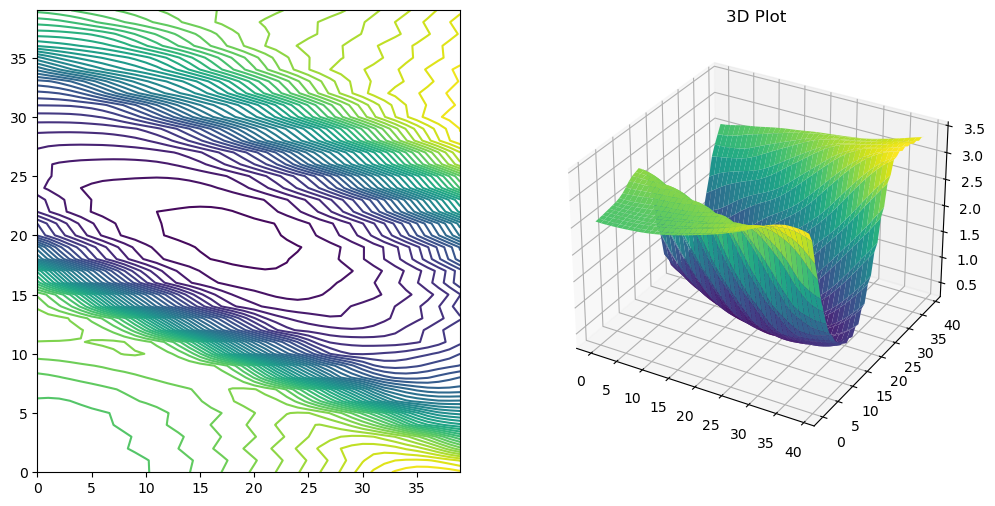

In [76]:
x, y = iter(trainloader).__next__()
STEPS = 40
metric = loss_landscapes.metrics.Loss(criterion, x, y)
model = resnet18.cpu()

loss_data_fin = loss_landscapes.random_plane(model, metric, 2, STEPS, normalization='filter', deepcopy_model=True)
plot_landscape(loss_data_fin, STEPS)

In [77]:
plot_landscape_3d(loss_data_fin, STEPS)

# No residual connexion

In [60]:
W_resnet18 = model_cifar.ResNet20_noshort()
W_resnet18.load_state_dict(torch.load('W_resnet18.pth'))

<All keys matched successfully>

C:\Users\Pierre\AppData\Local\Temp\ipykernel_13628\395532663.py:14: UserWarning:

Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.



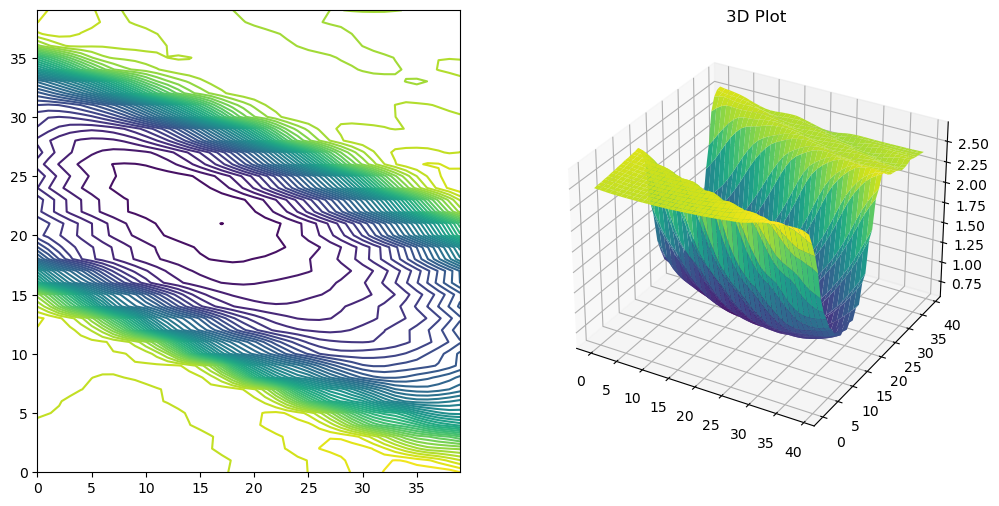

In [61]:
x, y = iter(trainloader).__next__()
STEPS = 40
metric = loss_landscapes.metrics.Loss(criterion, x, y)
model = W_resnet18.cpu()

loss_data_fin = loss_landscapes.random_plane(model, metric, 2, STEPS, normalization='filter', deepcopy_model=True)
plot_landscape(loss_data_fin, STEPS)

# Deeper model

In [63]:
resnet56 = model_cifar.ResNet56()
resnet56.load_state_dict(torch.load('resnet56.pth'))

<All keys matched successfully>

C:\Users\Pierre\AppData\Local\Temp\ipykernel_13628\2761597763.py:14: UserWarning:

Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.



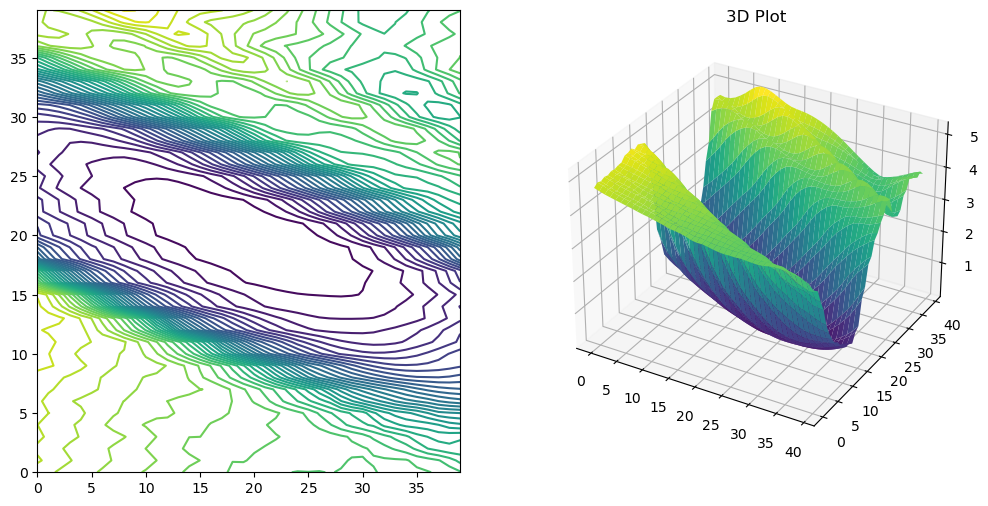

In [78]:
x, y = iter(trainloader).__next__()
STEPS = 40
metric = loss_landscapes.metrics.Loss(criterion, x, y)
model = resnet56.cpu()

loss_data_fin = loss_landscapes.random_plane(model, metric, 2, STEPS, normalization='filter', deepcopy_model=True)
plot_landscape(loss_data_fin, STEPS)

# No residual connection

C:\Users\Pierre\AppData\Local\Temp\ipykernel_13628\2761597763.py:14: UserWarning:

Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.



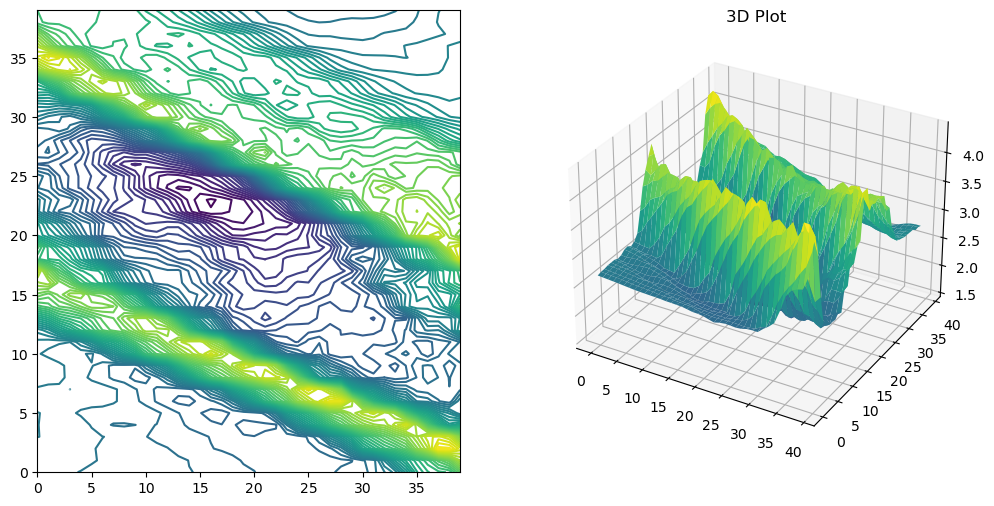

In [81]:
W_resnet56 = model_cifar.ResNet56_noshort()
W_resnet56.load_state_dict(torch.load('W_resnet56.pth'))
x, y = iter(testloader).__next__()
STEPS = 40
metric = loss_landscapes.metrics.Loss(criterion, x, y)
model = W_resnet56.cpu()
loss_data_fin = loss_landscapes.random_plane(model, metric, 2, STEPS, normalization='filter', deepcopy_model=True)
plot_landscape(loss_data_fin, STEPS)

In [82]:
plot_landscape_3d(loss_data_fin, STEPS)

# Even deeper network

C:\Users\Pierre\AppData\Local\Temp\ipykernel_13628\395532663.py:14: UserWarning:

Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.



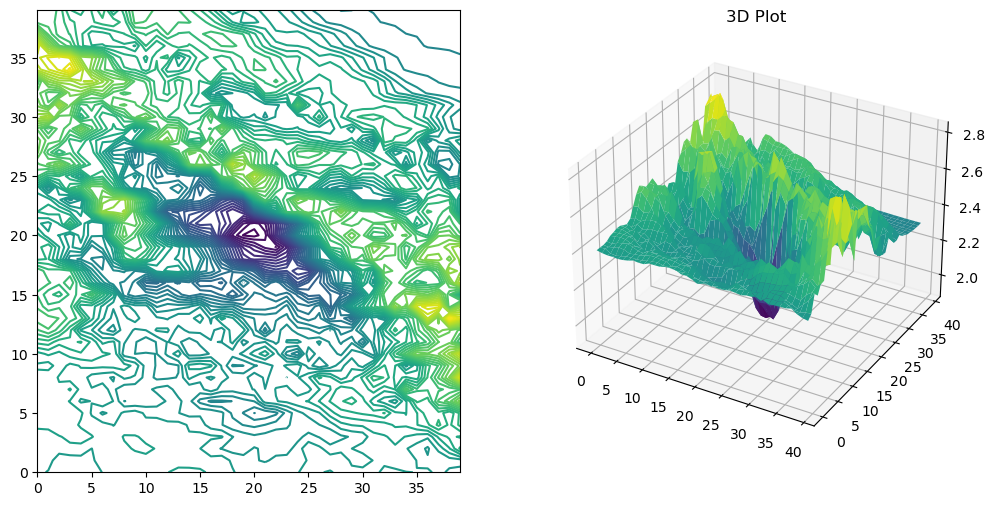

In [70]:
W_resnet110 = model_cifar.ResNet110_noshort()
W_resnet110.load_state_dict(torch.load('W_resnet110_weights.pth'))

STEPS = 40
metric = loss_landscapes.metrics.Loss(criterion, x, y)
model = W_resnet110.cpu()
loss_data_fin = loss_landscapes.random_plane(model, metric, 2, STEPS, normalization='filter', deepcopy_model=True)
plot_landscape(loss_data_fin, STEPS)

In [73]:
plot_landscape_3d(loss_data_fin, STEPS)